# World Wide Products Inc.
    For this project, the trend for product 1278 was invetigated. Time series forecasting methods were applied:
        1. Arima
        2. Prophet

In [1]:
# Load libraies
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

# Load Data Frames

In [2]:
#load Raw Data
df = pd.read_csv("../data/Historical Product Demand.csv",encoding ='latin' ,low_memory =False)

In [3]:
df.head(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
print("There are : " + str(df.Product_Code.unique().size)+ " products")
print("There are : " + str(df.Warehouse.unique().size)+" Warehouse")
print("There are : " + str(df.Product_Category.unique().size) +" product categories")

There are : 2160 products
There are : 4 Warehouse
There are : 33 product categories


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'] ,errors='coerce')
df = df.dropna()
print('date range: ' + str(df['Date'].min()) + ' to ' + str(df['Date'].max()))

date range: 2011-01-08 00:00:00 to 2017-01-09 00:00:00


In [6]:
df_2011 = pd.DataFrame(df[df['Date'].dt.year == 2011])
df_2012 = pd.DataFrame(df[df['Date'].dt.year == 2012])
df_2013 = pd.DataFrame(df[df['Date'].dt.year == 2013])
df_2014 = pd.DataFrame(df[df['Date'].dt.year == 2014])
df_2015 = pd.DataFrame(df[df['Date'].dt.year == 2015])
df_2016 = pd.DataFrame(df[df['Date'].dt.year == 2016])

In [7]:
df_2011_OD = df_2011.groupby('Product_Category')['Order_Demand'].sum()
df_2012_OD = df_2012.groupby('Product_Category')['Order_Demand'].sum()
df_2013_OD = df_2013.groupby('Product_Category')['Order_Demand'].sum()
df_2014_OD = df_2014.groupby('Product_Category')['Order_Demand'].sum()
df_2015_OD = df_2015.groupby('Product_Category')['Order_Demand'].sum()
df_2016_OD = df_2016.groupby('Product_Category')['Order_Demand'].sum()

# Visualize dataset
   1. Order demand for various categories from 2011 to 2016
   2. Warehouse order demand from 2011 to 2016

# Order demand for various categories from 2011 to 2016

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

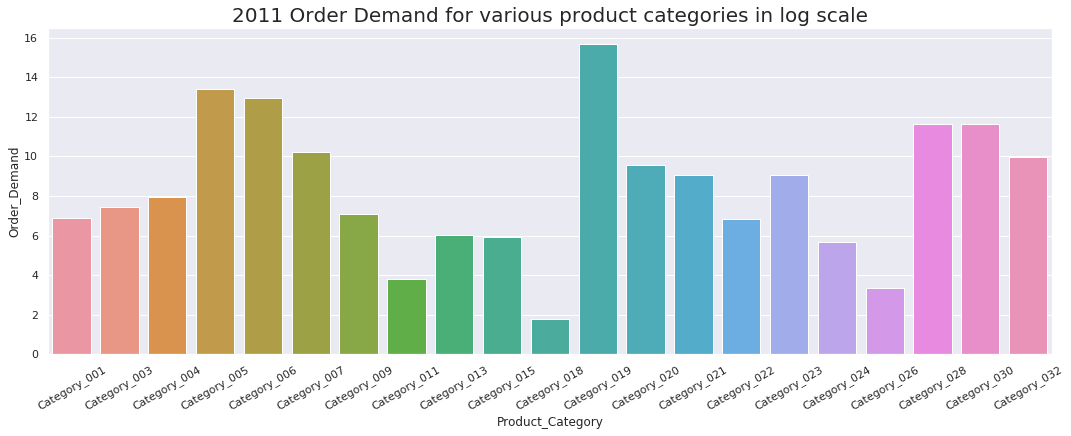

In [8]:
plt.figure(figsize = (18,6))
sns.set(style="darkgrid")
ax = sns.barplot(x= df_2011_OD.index, y = np.log(df_2011_OD)).set_title('2011 Order Demand for various product categories in log scale', fontsize =20)
plt.xticks(rotation = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

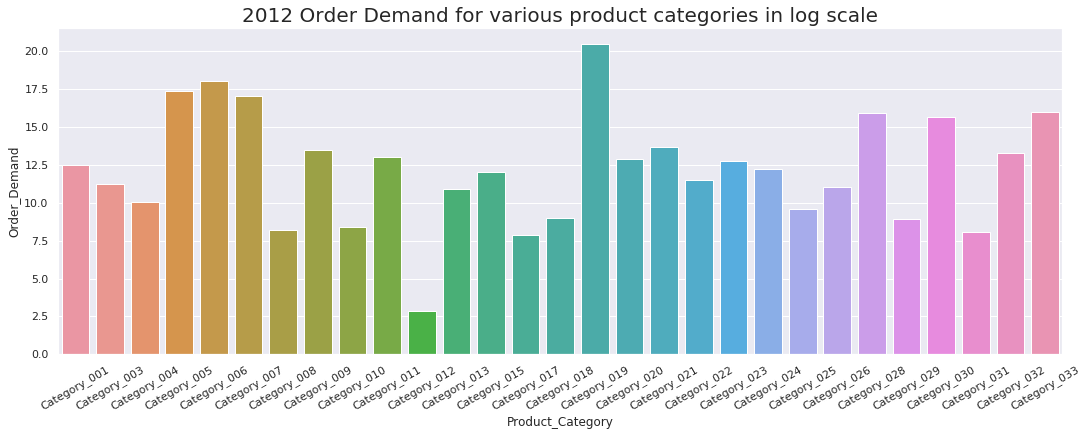

In [9]:
plt.figure(figsize = (18,6))
sns.set(style="darkgrid")
ax = sns.barplot(x = df_2012_OD.index, y = np.log(df_2012_OD)).set_title('2012 Order Demand for various product categories in log scale', fontsize =20)
plt.xticks(rotation = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

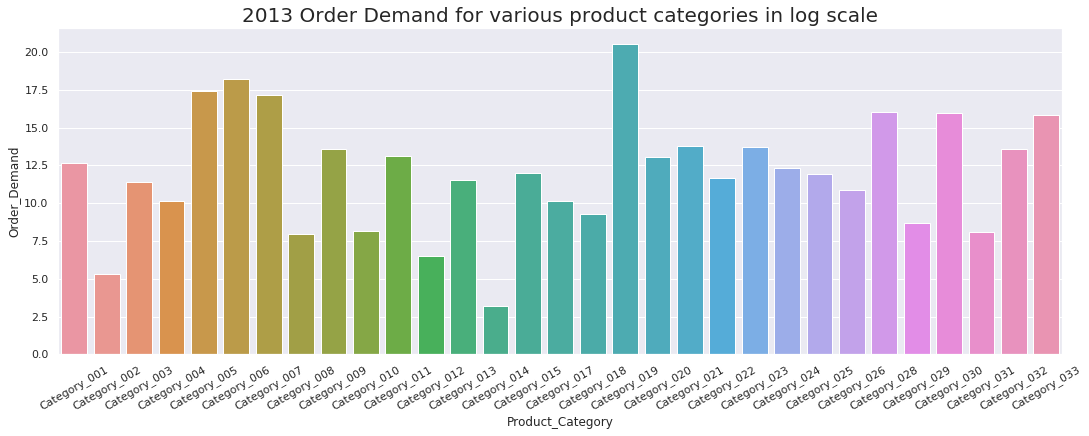

In [10]:
plt.figure(figsize = (18,6))
sns.set(style="darkgrid")
ax = sns.barplot(x = df_2013_OD.index, y = np.log(df_2013_OD)).set_title('2013 Order Demand for various product categories in log scale', fontsize =20)
plt.xticks(rotation = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

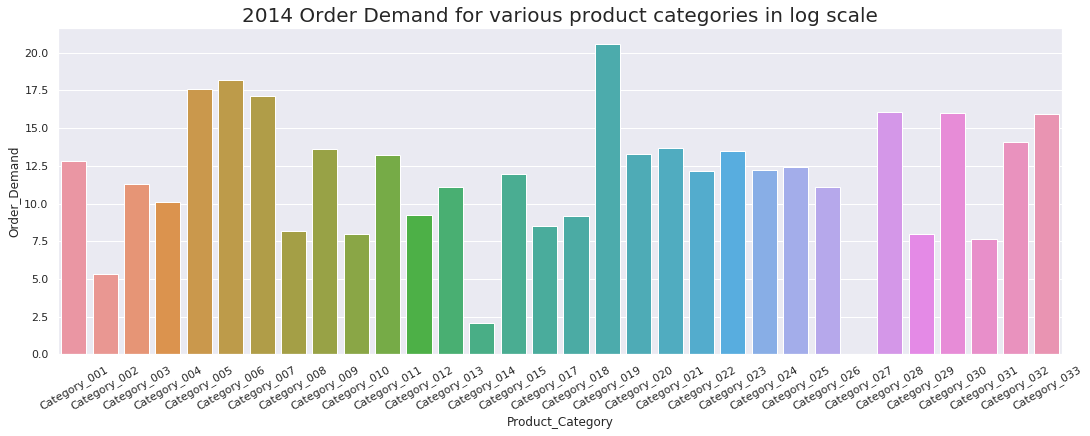

In [11]:
plt.figure(figsize = (18,6))
sns.set(style="darkgrid")
ax = sns.barplot(x = df_2014_OD.index, y = np.log(df_2014_OD)).set_title('2014 Order Demand for various product categories in log scale', fontsize =20)
plt.xticks(rotation = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

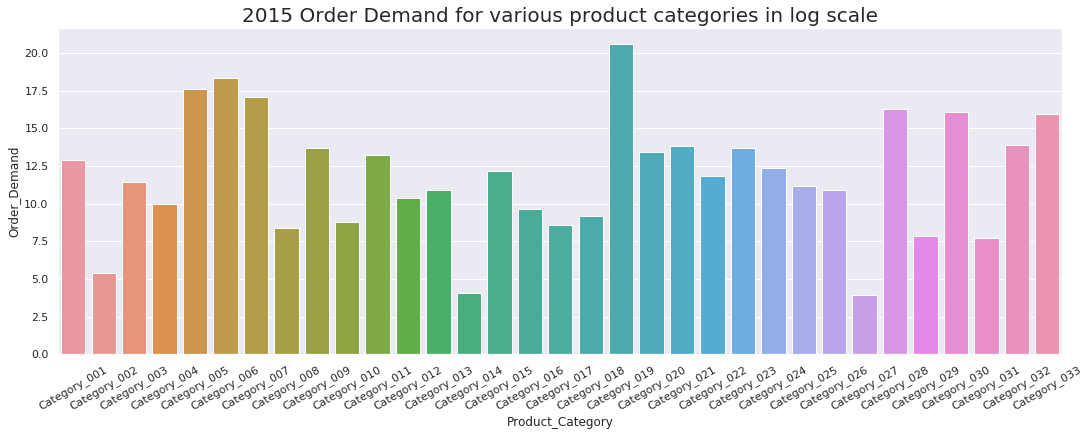

In [12]:
plt.figure(figsize = (18,6))
sns.set(style="darkgrid")
ax = sns.barplot(x = df_2015_OD.index, y = np.log(df_2015_OD)).set_title('2015 Order Demand for various product categories in log scale', fontsize =20)
plt.xticks(rotation = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

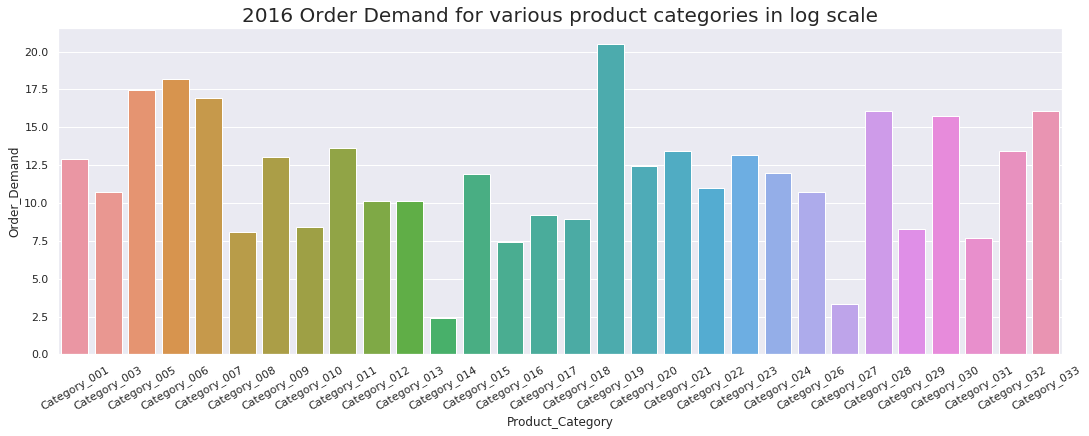

In [13]:
plt.figure(figsize = (18,6))
sns.set(style="darkgrid")
ax = sns.barplot(x = df_2016_OD.index, y = np.log(df_2016_OD)).set_title('2016 Order Demand for various product categories in log scale', fontsize =20)
plt.xticks(rotation = 30)

From the graphs above, from 2011 to 2016, the most product category ordered is 19. 

In [14]:
# I'm interested in knowing the categories from 2011 to 2016. 2011 has the least number of categories. 
Product_list = []
for i in df_2011.Product_Code.unique():
    if i in df_2012.Product_Code.unique():
        if i in df_2013.Product_Code.unique():
            if i in df_2014.Product_Code.unique():
                if i in df_2015.Product_Code.unique():
                    if i in df_2016.Product_Code.unique():
                        Product_list.append(i)

In [15]:
len(Product_list)

278

In [16]:
df_2011_WH = df_2011.groupby('Warehouse')['Order_Demand'].sum()
df_2012_WH = df_2012.groupby('Warehouse')['Order_Demand'].sum()
df_2013_WH = df_2013.groupby('Warehouse')['Order_Demand'].sum()
df_2014_WH = df_2014.groupby('Warehouse')['Order_Demand'].sum()
df_2015_WH = df_2015.groupby('Warehouse')['Order_Demand'].sum()
df_2016_WH = df_2016.groupby('Warehouse')['Order_Demand'].sum()

In [17]:
df_WH = pd.concat([df_2011_WH,df_2012_WH,df_2013_WH,df_2014_WH,df_2015_WH,df_2016_WH],axis =1)
df_wh_yr = pd.DataFrame(columns = ['year','Warehouse_A','Warehouse_C','Warehouse_J','Warehouse_S'])
df_wh_yr.year = ['2011','2012','2013','2014','2015','2016']

In [18]:
df_wh_yr.Warehouse_A = df_WH.loc['Whse_A',:].values
df_wh_yr.Warehouse_C = df_WH.loc['Whse_C',:].values
df_wh_yr.Warehouse_J = df_WH.loc['Whse_J',:].values
df_wh_yr.Warehouse_S = df_WH.loc['Whse_S',:].values

In [19]:
pd.to_numeric(df_wh_yr.year)
pd.to_numeric(df_wh_yr.Warehouse_A)
pd.to_numeric(df_wh_yr.Warehouse_C)
pd.to_numeric(df_wh_yr.Warehouse_J)
pd.to_numeric(df_wh_yr.Warehouse_S)

0      4482476.0
1    207703048.0
2    210106137.0
3    225922414.0
4    243989389.0
5    143922425.0
Name: Warehouse_S, dtype: float64

# Warehouse order demand from 2011 to 2016

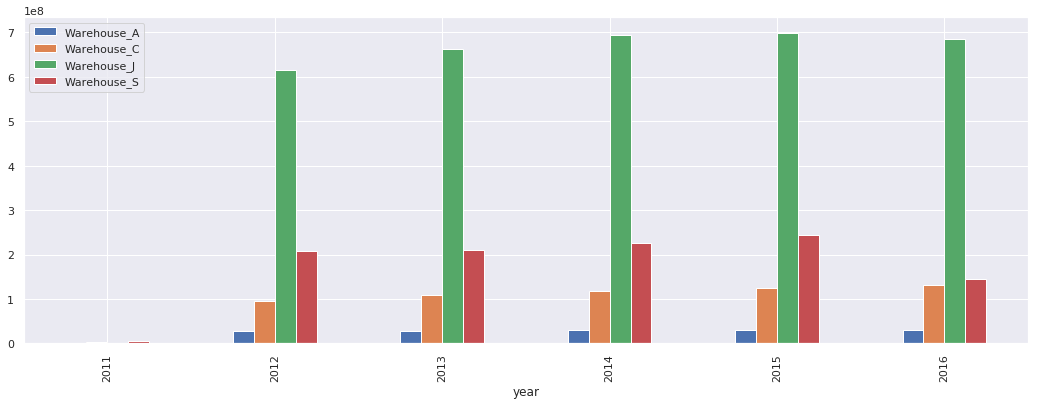

In [20]:
df_wh_yr.plot(figsize = (18,6) , x = "year", y = ["Warehouse_A", "Warehouse_C", "Warehouse_J","Warehouse_S"],kind = "bar")

From this plot, it is pretty obvious the key warehouse is warehouse J from 2011 and 2016.

# Time Series Forecasting

In [21]:
df = df.drop(columns=['Warehouse','Product_Category'])

In [22]:
Product_list[1]

'Product_1278'

In [23]:
df_1278 = df.loc[df['Product_Code'] == Product_list[1]]

In [24]:
df_1278.index = df_1278['Date'].astype('datetime64[ns]')
df_1278_month = df_1278.resample('M').sum()
df_1278_day = df_1278.resample('D').sum()

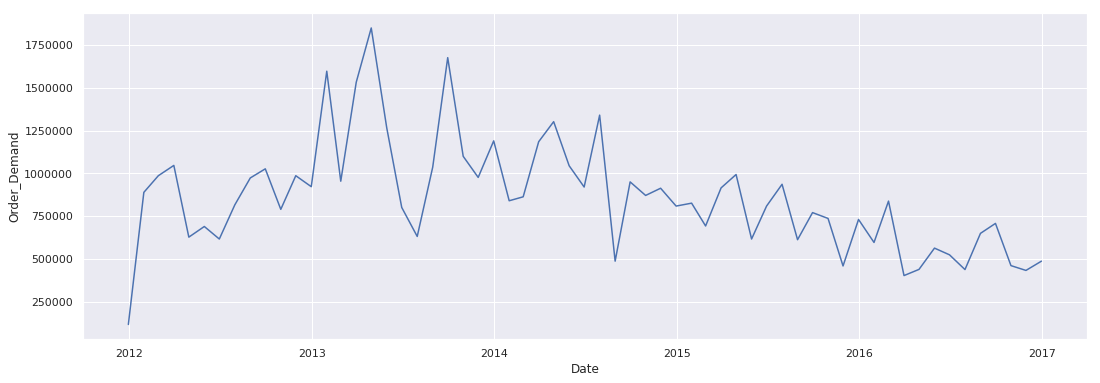

In [25]:
plt.figure(figsize = (18,6))
sns.lineplot(x = df_1278_month.index,y = 'Order_Demand',data = df_1278_month)

# Arima

In [26]:
train_series = df_1278_month.loc[df_1278_month.index < "2016-01-01"]
test_series = df_1278_month.loc[df_1278_month.index >= "2016-01-01"]

In [27]:
from statsmodels.tsa.arima_model import ARIMA
train2 = (df_1278_month - df_1278_month.mean())
model = ARIMA(train2, order=(2, 1, 0), freq='M')
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors

                             ARIMA Model Results                              
Dep. Variable:         D.Order_Demand   No. Observations:                   60
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -839.923
Method:                       css-mle   S.D. of innovations         289860.693
Date:                Fri, 20 Dec 2019   AIC                           1687.846
Time:                        12:28:10   BIC                           1696.223
Sample:                    01-31-2012   HQIC                          1691.122
                         - 12-31-2016                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6150.0000   2.18e+04      0.283      0.778   -3.65e+04    4.88e+04
ar.L1.D.Order_Demand    -0.4573      0.131     -3.486      0.001      -0.714      -0.200
ar.L2.D.Orde

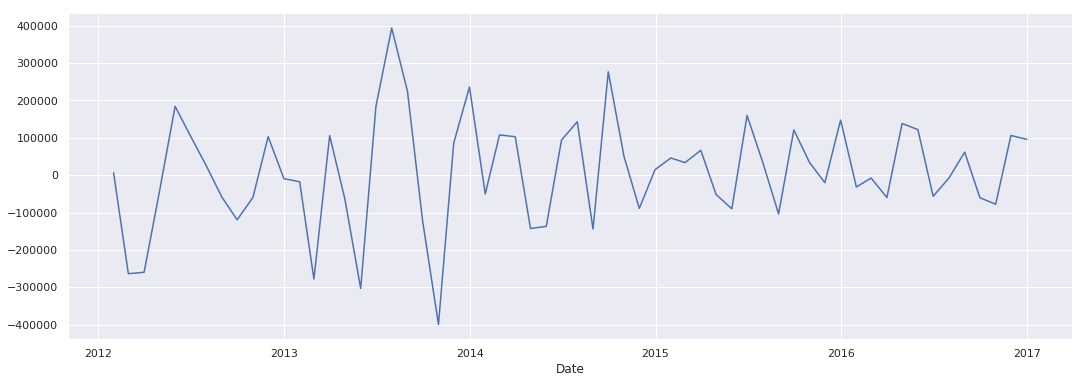

In [28]:
plt.figure(figsize = (18,6))
forecast = model_fit.predict()
sns.lineplot(x = forecast.index,y = forecast)

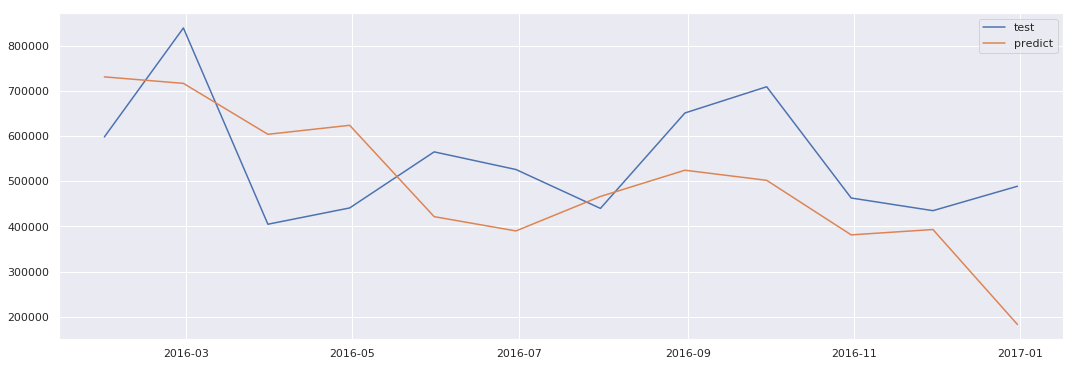

In [29]:
import pmdarima as pm
rs_fit = pm.auto_arima(train_series, start_p=0, start_q=0, max_p=10, max_d=10, max_q=10, m=7,
                       start_P=0, max_P=10, max_D=10, max_Q=10, seasonal=True,
                       stationary=False,
                       d=1, D=1,
                       error_action='ignore',  # don't want to know if an order does not work
                       suppress_warnings=True,  # don't want convergence warnings
                       stepwise=True, )

predictions = rs_fit.fit_predict(train_series,n_periods=test_series.shape[0])
predictions_df = pd.DataFrame(predictions)
predictions_df.index = test_series.index
plt.figure(figsize = (18,6))
plt.plot(test_series,label = 'test')
plt.plot(predictions_df,label ='predict')
plt.legend( ["test", "predict"])
plt.show()

# Prophet

In [30]:
forecast = df_1278_day
forecast = forecast.rename(columns={ 'Order_Demand': "y" })
forecast.reset_index(level=0, inplace=True)
forecast = forecast.rename(columns={ 'Date': "ds" })

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


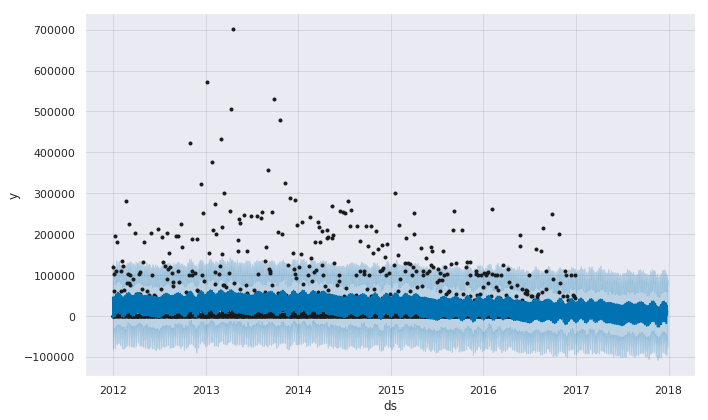

In [31]:
model = Prophet()
model.fit(forecast)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig1 = model.plot(forecast)

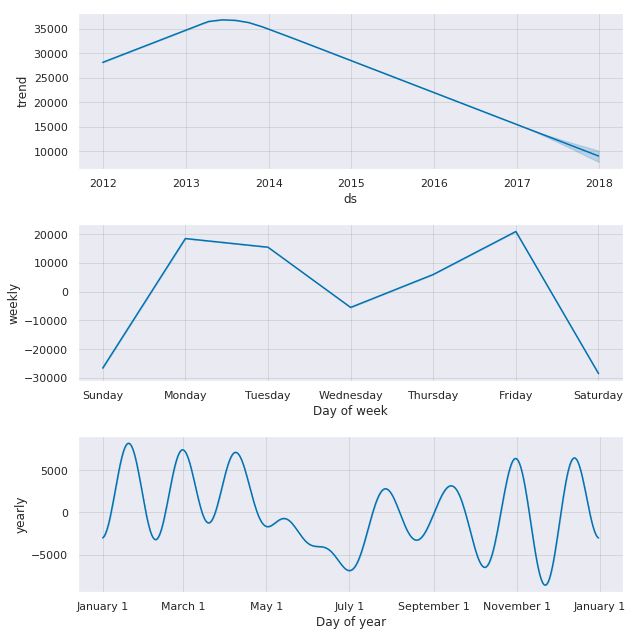

In [32]:
fig2 = model.plot_components(forecast)

# Conclusion:
    The result is not really applealing, sicne from the time series, the order demand trend for product 1278 is not decreasing, while the time series focasting result suggested that the predicted trend is decresing. 